In [ ]:
import numpy as np
from PIL import Image
import skimage
import os

In [ ]:
#FUNCTIONS

def resize(file_name):
    orig_image=Image.open(file_name)
    dimension=512
    height=orig_image.size[0]
    width=orig_image.size[1]
    image=orig_image.resize([dimension,dimension])
    no_of_blocks=(dimension*dimension)/(8*8)
    max_limit=(no_of_blocks)**(1/2)
    array=np.asarray(image)
    return array, max_limit, dimension, height, width, orig_image

def init_matrix(x,y):
    list_name=[]
    for i in range(0,x):
        list_name.append([])
        for j in range(0,y):
            list_name[i].append([])
    return list_name

def separate_components(x,y,k,array,list_name):
    for i in range(0,x):
        for j in range(0,y):
            list_name[i][j]=array[i][j][k]
    return list_name

def list2array(list_name):
    array=np.asarray(list_name)
    return array

def create_blocks(array):
    blocks=skimage.util.view_as_blocks(array, block_shape=(8,8))
    return blocks

def transform_matrix():
    B = [[0.35355, 0.35355, 0.50000, 0.00000, 0.70711, 0.00000, 0.00000, 0.00000],
         [0.35355, 0.35355, 0.50000, 0.00000, -0.70711, 0.00000, 0.00000, 0.00000],
         [0.35355, 0.35355, -0.50000, 0.00000, 0.00000, 0.70711, 0.00000, 0.00000],
         [0.35355, 0.35355, -0.50000, 0.00000, 0.00000, -0.70711, 0.00000, 0.00000],
         [0.35355, -0.35355, 0.00000, 0.50000, 0.00000, 0.00000, 0.70711, 0.00000],
         [0.35355, -0.35355, 0.00000, 0.50000, 0.00000, 0.00000, -0.70711, 0.00000],
         [0.35355, -0.35355, 0.00000, -0.50000, 0.00000, 0.00000, 0.00000, 0.70711],
         [0.35355, -0.35355, 0.00000, -0.50000, 0.00000, 0.00000, 0.00000, -0.70711]
         ]
    H=np.asarray(B)
    return H

def matrix_product(array1, array2):
    product=init_matrix(8,8)
    array1=list2array(array1)
    array2=list2array(array2)
    for k in range(0,8):
        for i in range(0,8):
            product[k][i]=0
            for j in range(0,8):
                product[k][i]=product[k][i]+(array1[k][j]*array2[j][i])
    product=list2array(product)
    return product

def transpose(list_name):
    b=init_matrix(8,8)
    for i in range(0,8):
        for j in range(0,8):
                b[j][i]=list_name[i][j]
    b=list2array(b)
    return b


In [ ]:
# SECONDARY FUNCTIONS
def return_size(filename):
    size=os.path.getsize(filename)
    return size


In [ ]:
# Image as input followed by resizing
filename='decompressed.jpg'
original_size=return_size(filename)
array,maxo,dimension,orig_height,orig_width,orig_image=resize(filename)
maxo=int(maxo)

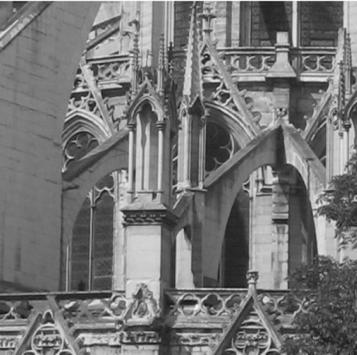

In [ ]:
orig_image

In [ ]:
print(array.shape)

(512, 512, 3)


In [ ]:
x=array.shape[0]
y=array.shape[1]
red=init_matrix(x,y)
green=init_matrix(x,y)
blue=init_matrix(x,y)

In [ ]:
# Separating the red, green & blue components of the picture
red_component=separate_components(x,y,0,array,red)
green_component=separate_components(x,y,1,array,green)
blue_component=separate_components(x,y,2,array,blue)

In [ ]:
red_component=list2array(red_component)
green_component=list2array(green_component)
blue_component=list2array(blue_component)

In [ ]:
# Creating 8x8 blocks
red_blocks=create_blocks(red_component)
green_blocks=create_blocks(green_component)
blue_blocks=create_blocks(blue_component)

In [ ]:
H=transform_matrix()
print(H)

[[ 0.35355  0.35355  0.5      0.       0.70711  0.       0.       0.     ]
 [ 0.35355  0.35355  0.5      0.      -0.70711  0.       0.       0.     ]
 [ 0.35355  0.35355 -0.5      0.       0.       0.70711  0.       0.     ]
 [ 0.35355  0.35355 -0.5      0.       0.      -0.70711  0.       0.     ]
 [ 0.35355 -0.35355  0.       0.5      0.       0.       0.70711  0.     ]
 [ 0.35355 -0.35355  0.       0.5      0.       0.      -0.70711  0.     ]
 [ 0.35355 -0.35355  0.      -0.5      0.       0.       0.       0.70711]
 [ 0.35355 -0.35355  0.      -0.5      0.       0.       0.      -0.70711]]


In [ ]:
# Initialising empty 8x8 matrices to store compressed components later
compressed_red=init_matrix(maxo,maxo)
compressed_green=init_matrix(maxo,maxo)
compressed_blue=init_matrix(maxo,maxo)

In [ ]:
H_transpose=transpose(H)
for i in range(len(red_blocks)):
    for j in range(0,len(red_blocks)):
        compressed_red[i][j]=matrix_product(matrix_product(H_transpose,red_blocks[i][j]),H)
for i in range(len(green_blocks)):
    for j in range(0, len(green_blocks)):
        compressed_green[i][j]=matrix_product(matrix_product(H_transpose,green_blocks[i][j]),H)
for i in range(len(blue_blocks)):
    for j in range(0, len(blue_blocks)):
        compressed_blue[i][j]=matrix_product(matrix_product(H_transpose,blue_blocks[i][j]),H)


In [ ]:
compressed_red=list2array(compressed_red)
compressed_green=list2array(compressed_green)
compressed_blue=list2array(compressed_blue)

In [ ]:
components_red=compressed_red.transpose(0,2,1,3).reshape(dimension,dimension)
components_green=compressed_green.transpose(0,2,1,3).reshape(dimension,dimension)
components_blue=compressed_blue.transpose(0,2,1,3).reshape(dimension,dimension)

In [ ]:
# Initialising 'compressed' list to store all the three compressed components in one matrix
compressed=[]
for i in range(0,x):
    compressed.append([])
    for j in range(0,y):
        compressed[i].append([])
        for k in range(0,3):
            compressed[i][j].append([])



In [ ]:
for i in range(0,x):
    for j in range(0,y):
        compressed[i][j][0]=components_red[i][j]
        compressed[i][j][1]=components_green[i][j]
        compressed[i][j][2]=components_blue[i][j]

In [ ]:
compressed=list2array(compressed)
compressed=compressed.astype(np.uint8)
print(compressed)

[[[195 195 195]
  [243 243 243]
  [251 251 251]
  ...
  [  2   2   2]
  [  2   2   2]
  [  1   1   1]]

 [[221 221 221]
  [253 253 253]
  [  2   2   2]
  ...
  [  0   0   0]
  [255 255 255]
  [  0   0   0]]

 [[ 65  65  65]
  [  2   2   2]
  [  0   0   0]
  ...
  [255 255 255]
  [255 255 255]
  [  0   0   0]]

 ...

 [[226 226 226]
  [  2   2   2]
  [  2   2   2]
  ...
  [  0   0   0]
  [255 255 255]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]]


In [ ]:
image_compressed=Image.fromarray(compressed)

In [ ]:
image_compressed=image_compressed.resize([orig_height,orig_width])

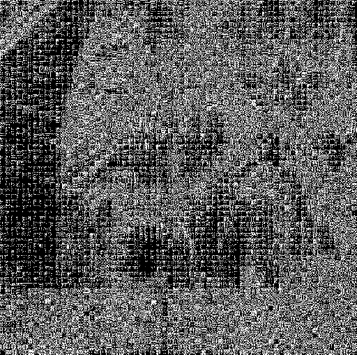

In [ ]:
image_compressed

In [ ]:
# Initialising three lists to store decompressed components
decompressed_red=init_matrix(maxo,maxo)
decompressed_green=init_matrix(maxo,maxo)
decompressed_blue=init_matrix(maxo,maxo)

In [ ]:
for i in range(len(red_blocks)):
    for j in range(len(red_blocks)):
        decompressed_red[i][j]=matrix_product(matrix_product(H,compressed_red[i][j]),H_transpose)
for i in range(len(green_blocks)):
    for j in range(len(green_blocks)):
        decompressed_green[i][j]=matrix_product(matrix_product(H,compressed_green[i][j]),H_transpose)
for i in range(len(blue_blocks)):
    for j in range(len(blue_blocks)):
        decompressed_blue[i][j]=matrix_product(matrix_product(H,compressed_blue[i][j]),H_transpose)

In [ ]:
decompressed_red=list2array(decompressed_red)
decompressed_green=list2array(decompressed_green)
decompressed_blue=list2array(decompressed_blue)


In [ ]:
red_components=decompressed_red.transpose(0,2,1,3).reshape(dimension,dimension)
green_components=decompressed_green.transpose(0,2,1,3).reshape(dimension,dimension)
blue_components=decompressed_blue.transpose(0,2,1,3).reshape(dimension,dimension)

In [ ]:
# Initialising 'decompressed' list to store all the three components.
decompressed=[]
for i in range(0,x):
    decompressed.append([])
    for j in range(0,y):
        decompressed[i].append([])
        for k in range(0,3):
            decompressed[i][j].append([])


In [ ]:
for i in range(0,x):
    for j in range(0,y):
        decompressed[i][j][0]=red_components[i][j]
        decompressed[i][j][1]=green_components[i][j]
        decompressed[i][j][2]=blue_components[i][j]

In [ ]:
# 'decompressed' contains all the three colour components after decompression
decompressed=list2array(decompressed)

In [ ]:
decompressed_image_array=decompressed.astype(np.uint8)
print(decompressed_image_array)

[[[237 237 237]
  [236 236 236]
  [236 236 236]
  ...
  [250 250 250]
  [250 250 250]
  [250 250 250]]

 [[167 167 167]
  [168 168 168]
  [168 168 168]
  ...
  [226 226 226]
  [225 225 225]
  [225 225 225]]

 [[ 93  93  93]
  [ 94  94  94]
  [ 94  94  94]
  ...
  [201 201 201]
  [200 200 200]
  [200 200 200]]

 ...

 [[153 153 153]
  [152 152 152]
  [152 152 152]
  ...
  [ 33  33  33]
  [ 40  40  40]
  [ 46  46  46]]

 [[153 153 153]
  [152 152 152]
  [152 152 152]
  ...
  [ 32  32  32]
  [ 40  40  40]
  [ 47  47  47]]

 [[153 153 153]
  [152 152 152]
  [152 152 152]
  ...
  [ 32  32  32]
  [ 40  40  40]
  [ 47  47  47]]]


In [ ]:
# Converting the decompressed matrix into image and resizing it to the original dimensions
decompressed_img=Image.fromarray(decompressed_image_array)
decompressed_img=decompressed_img.resize([orig_height,orig_width])

In [ ]:
decompressed_img.save('decompressed.jpg')

In [ ]:
compressed_size=return_size('decompressed.jpg')

In [ ]:
print("ORIGINAL SIZE (KB) : ",float(original_size/1024))
print("COMPRESSED SIZE (KB) : ",float(compressed_size/1024))
ratio=float(original_size/1024)/float(compressed_size/1024)
print("COMPRESSION PERCENTAGE : ",100-(100/ratio))

ORIGINAL SIZE (KB) :  26.01953125
COMPRESSED SIZE (KB) :  25.7900390625
COMPRESSION PERCENTAGE :  0.8819996997447817


In [ ]:
from math import log10
def PSNR(original, compressed):
    diff=(original-compressed)
    mse=np.mean((original-compressed)**2)
    max_pixel=255
    psnr=20*log10(max_pixel/((mse)**(1/2)))
    return psnr


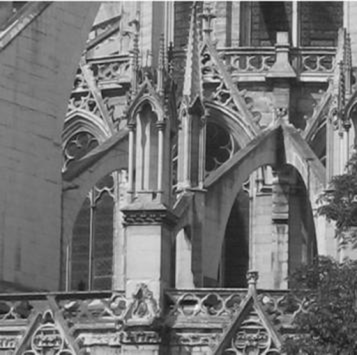

In [ ]:
decompressed_img